# ProfHuster's Ray Tracing Notebook
This is a `Jupyter Notebook` that builds a two-lens system in the thin lens approximation. There is a checkbox for turning the ray tracing on and off.

## How to Ray Trace
### Using the Thin Lens Formula
The first way you can ray trace is by using the thin lens formula,
$\frac{1}{d_o} + \frac{1}{d_o} = \frac{1}{f_1}$ 
for the first lens to find the position of the image made by that lens. You also must calculate the magnification of that first image as $m_1 = -\frac{d_{i,1}}{d_o}$. Then you consider that image as the _object_ for the second lens and use the formula again to find the position of the image made by the second lens _relative to that second lens_. You also need to calculate the magnification of the second lens, $m_2 = -\frac{d_{i,2}}{d_{o,2}}$. The final magnification of the image is $m = m_1 \cdot m_2$.

### Ray Tracing by Matrices
A second way to find the properties of an optical system is to us the matrix approach. This is the approach actually used below. It is covered in your textbook. The matrix method has the limit of only working the in the paraxial (small angle) approximation. Actually the thin lens formula is also limited to this same approximation. An entire optical system, no matter how many lenses, is determined by a single 2x2 matrix. Once you compute the matrix, the physical lenses are conceptually replaced by two planes, and two focal points. Then ray tracing can be done using just these plane and points and ignoring the actual lenses.

The _Front Focal Point_ (_FFP_) is the point in front of the first lens. Any ray passing through that point, exits the system parallel to the optical axis. To trace such a ray through the system, draw a line from the top of your object, through the front focal plane, then extend that line (possible in either direction) to the _First Principal Plane_ (_PP1_). From that intersection point, extend the line horizontally to the right until it leaves the system and continues as far as necessary. For virtual images, you may have to extend the line back toward the left.

The _Back Focal Point_ (_BFP_) is the point after the system at which a ray entering the system parallel to the optical axis will cross the optical axis. To trace such a ray through the system, draw a line from the top of your object, parallel to the optic axis until it intersects the _Second Principal Plane_ (PP2). From that intersection point, draw a line through the _BFP_. Extend the line to the right until it leaves the system and continues as far as necessary. For virtual images, you may have to extend the line back toward the left. It will intersect the first ray drawn. The intersection is the system image of the object.

You can also trace the _Nodal Ray_ from your object. Draw a line from the top of your object to the point where PP1 (the First Principal Plane) intersects the optical axis. Measure the angle of intersection. Then draw a second line from where _PP2_ intersects the optical axis with the same slope. You may have to extend the line in both directions. This line should for a three-way intersection with the first two rays you traced.

Once you have these rays traced, you can measure where the image is, and the magnification of the image. 

**A Caution**: Sometimes the focal points and planes have an order that seems wrong. For example in the default example below, _PP2_ is **before** _PP1_. Have faith in the method; it works. Also be aware that the image may be **to the left** of the object. That is ok, too. It means the image is virtual. In fact, the only real images are ones that are to the right of the last lens.


## The Program
You can choose the focal lengths of the lenses from the dropdown menus. The available focal lengths are the same focal lengths you have available in the lab. There are four negative focal length lenses ranging from -100 to -25 mm, and 14 positive focal lenght lenses ranging from 25.4 to 1000 mm. 

The parameter `d` is the distance between the lenses. You can adjust it from 0 to 400 mm.

The parameter `do` is the distance between the lenses. You can adjust it from 1 to 2000 mm.

You can turn the Matrix-based ray tracing on and off with a checkbox. You can adjust the Thin Lens-based ray tracing with the slider. 
* `0` - the thin lens raytracing is off
* `1` - only rays from the object to the first lens' image are traced
* `2` - only rays from the first lens' image to the second len's image are traced
* `3` - all the rays for the thin lens approach are traced

These parameters are set in the code cell `# Imports and global variables`.

In [2]:
# Imports and global variables 
%matplotlib inline
from ipywidgets import interact
import matplotlib.pyplot as plt
import random as ran
import numpy as np

# Global variables
gHeight = 25.0 # Height of lenses
gImHt = 10.0   # Height of image arrow

# Distance slider mins and maxs
gDMin = 0
gDMax = 250
gDoMin = 1
gDoMax = 800

# The lenses are from the Thorlab LSB04 Optics Kit
gFocalLengths = (-30, -50, -75, -100, 25.4, 35, 50, 75, 100, 125, 150, 200, 250, 300, 400, 500, 750, 1000)

gFLArg = []
for fl in gFocalLengths:
    gFLArg.append(str(fl))
    
gFileNameBase = r"TwoLens%s.png"

In [11]:
# Code to plot lens system and ray tracing
gYLim = 15.0
gKey1 = 'k^'
gKey2 = 'kv'

# wrap a plot generation function

def plotSystem(f1='100', d=50, f2='200', do=200, MatrixRays=False, ThinLensRays=0):
    
    # Calculate the Matrix and planes
    f1 = float(f1)
    f2 = float(f2)
    MLens1 = np.array([[1.,0],[-1./f1,1]])
    MTrans = np.array([[1.,d],[0,1.]])
    MLens2 = np.array([[1.,0],[-1./f2,1]])
    MSystem = MLens2.dot(MTrans.dot(MLens1))
    A = MSystem[0,0]
    B = MSystem[0,1]
    C = MSystem[1,0]
    D = MSystem[1,1]
    #print("ABCD = %f %f %f %f" %(A,B,C,D))

    # calculate the focal length
    FL1 = 1.0 / C
    FL2 = -FL1
    FL_EFF = FL2
    #print("FL1 = %f, FL2 = %f, FL-EFF = %f" % \
    #  (FL1,FL2,FL_EFF))

    # calculate the front and back focal planes
    FFP = D/C
    BFP = -A/C
    xBFP = d + BFP
    #print("FFP = %f, BFP = %f, xBFP = %f" % \
    #  (FFP,BFP,xBFP))
    
    # Calculate the first and second principal planes
    R_SYS = (D-1)/C
    S_SYS = (1-A)/C
    PP1 = R_SYS
    PP2 = d + S_SYS
    #print("R_SYS = %f, S_SYS = %f, PP1 = %f, PP2 = %f" % \
    #  (R_SYS,S_SYS,PP1,PP2))
    
    # Calculate the image position and magnification
    #print "do, (do+PP1), ((do + PP1) - FL_EFF)", do, (do-PP1), ((do + PP1) - FL_EFF)
    di = ((do + PP1) * FL_EFF) / ((do + PP1) - FL_EFF)
    xDi = di + PP2
    m = -di / (do + PP1)
    #print "di = %f, xDi = %f, m = %f" % (di, xDi, m)

    # Drawing the figure takes a lot of code
    # make figure and axes
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    
    # Draw lens 1
    ax.plot([0,0],[-gHeight/2,gHeight/2], 'k-', lw=4)
    if f1 > 0:
        (k1,k2) = (gKey1,gKey2)
    else:
        (k1,k2) = (gKey2,gKey1)
    ax.plot([0],[gHeight/2],k1,markersize=10)
    ax.plot([0],[-gHeight/2],k2,markersize=10)

    # draw lens 2
    ax.plot([d,d],[-gHeight/2,gHeight/2], 'k-', lw=4)
    if f2 > 0:
        (k1,k2) = (gKey1,gKey2)
    else:
        (k1,k2) = (gKey2,gKey1)
    ax.plot([d],[gHeight/2],k1,markersize=10)
    ax.plot([d],[-gHeight/2],k2,markersize=10)
    
    # Draw cardinal planes
    ax.plot([FFP],[0], 'ro', lw=1, mec='r', ms=7)
    ax.plot([xBFP],[0], 'ro', lw=1, mec='r', ms=7)
    ax.plot([PP1,PP1],[-gHeight/2,gHeight/2], 'g-', lw=1)
    ax.plot([PP2,PP2],[-gHeight/2,gHeight/2], 'g-', lw=1)
    
    # Label the cardinal planes
    ax.text((FFP), 0.6*gHeight, "FFP", ha='center', weight='bold')
    ax.text((xBFP), 0.6*gHeight, "BFP", ha='center', weight='bold')
    ax.text((PP1), 0.6*gHeight, "PP1", ha='center', weight='bold')
    ax.text((PP2), 0.6*gHeight, "PP2", ha='center', weight='bold')
    
    # Draw object and image
    ax.plot([-do,-do],[0,gImHt], 'b-', lw=4)
    ax.plot([-do],[gImHt], 'bo', markersize=10)
    ax.plot([xDi,xDi],[0,m * gImHt], 'b-', lw=4, alpha=0.5)
    ax.plot([xDi],[m * gImHt], 'bo', markersize=10, alpha=0.5)
    txt = "xi = %.0f\ndi = %.0f\nm = %.2f" % (xDi, di, m)
    if m > 0:
        yTxt = -.5 * gHeight
    else:
        yTxt = 0.05 * gHeight
    ax.text(xDi, yTxt, txt, ha='center', weight='bold')

    yLim = max(gYLim, 1.1*abs(m * gImHt))
    ax.set_ylim((-yLim, yLim))
    xMin = np.min((-do,FFP,xBFP,PP1,PP2,d,xDi))
    xMax = np.max((-do,FFP,xBFP,PP1,PP2,d,xDi))
    xRange = xMax - xMin
    xMin -= 0.05 * xRange
    xMax += 0.05 * xRange
    ax.set_xlim((xMin,xMax))
    ax.set_xlabel("Position (mm)")
    ax.plot((xMin,xMax),(0,0), 'k-')
    ax.set_ylabel("Height (mm)")
    Title = "do=%.0f, FL=%.0f, FFP=%.0f, PP1=%.0f, PP2=%.0f, xBFF=%.0f, di=%.0f\n " % \
      (do, FL_EFF, FFP, PP1, PP2, xBFP, xDi)
    ax.set_title(Title)
    
    if MatrixRays:
        # Plot ray through the back focal point - blue
        ax.plot((-do,PP2),(gImHt,gImHt), 'b--')
        mRay = (gImHt - 0) / (PP2 - xBFP)
        xRay = np.array((min(PP2,xBFP,xDi), max(PP2,xBFP,xDi)))
        yRay = mRay * (xRay - xBFP)
        ax.plot(xRay, yRay, 'b--')
        
        # Plot nodal ray - green
        mRay = (gImHt - 0) / (-do - PP1)
        xRay = np.array((min(-do,PP1), max(-do,PP1)))
        yRay = mRay * (xRay - PP1)
        ax.plot(xRay, yRay, 'g--')
        xRay = np.array((min(PP2,xDi), max(PP2,xDi)))
        yRay = mRay * (xRay - PP2)
        ax.plot(xRay, yRay, 'g--')
        
        # Plot ray through front focal point - red
        mRay = (gImHt - 0) / (-do - FFP)
        xRay = np.array((min(-do,FFP,PP1),max(-do,FFP,PP1)))
        yRay = mRay * (xRay - FFP)
        ax.plot(xRay, yRay, 'r--')
        xRay = np.array((min(PP1,xDi),max(PP1,xDi)))
        yRay = mRay * (PP1 - FFP)
        ax.plot(xRay,(yRay,yRay), 'r--')
    
    if ThinLensRays:
        # Plot focal points of the lenses
        xFP = np.array([-f1, f1, d-f2, d+f2])
        ax.plot(xFP, np.zeros_like(xFP), 'ro', color='w', mec='k', ms=5)
        
        # Calculate object and image positions
        di1 = do * f1 / (do - f1)
        m1 = -di1 / do
        #print "di1, m1 = ", di1, m1
        ax.plot([di1,di1],[0,m1 * gImHt], 'g-', lw=4, alpha=0.5)
        ax.plot([di1],[m1 * gImHt], 'go', markersize=10, alpha=0.5)
        imgStr = "di1 = %.0f\nm = %.2f" % (di1, -di1/do)
        ax.text(di1, 0.6*gHeight, imgStr, ha='center', weight='bold', color='green')

        do2 = d - di1
        xDo2 = do2 + d
        di2 = do2 * f2 / (do2 - f2)
        m2 = -di2 / do2
        #print "di2, m2, xDo2 = ", di2, m2, xDo2

        xMin = np.min((-do,FFP,xBFP,PP1,PP2,d,xDi, di1, -f1, d+f2))
        xMax = np.max((-do,FFP,xBFP,PP1,PP2,d,xDi, di1, -f1, d+f2))
        xRange = xMax - xMin
        xMin -= 0.05 * xRange
        xMax += 0.05 * xRange
        ax.set_xlim((xMin,xMax))

        # Plot traced rays
        if ThinLensRays in (1,3):
            # Through back focal point of lens1
            xRay = np.array([min(0, -do), max(0, -do)])
            ax.plot(xRay, [gImHt,gImHt], 'b--')
            mRay = (gImHt - 0) / (0 - f1)
            xRay = np.array([min(0, di1), max(0, di1)])
            yRay = mRay * (xRay - f1)
            ax.plot(xRay, yRay, 'b--')

            # Through front focal point of lens1
            mRay = (gImHt - 0) / (-do - (-f1))
            xRay = np.array([min(-do,-f1,0), max(-do,-f1,0)])
            yRay = mRay * (xRay - (-f1))
            ax.plot(xRay, yRay, 'r--')
            xRay = np.array([min(0, di1), max(0, di1)])
            yRay = mRay * (0 - (-f1))
            ax.plot(xRay, [yRay,yRay], 'r--')
        
            # Through node
            mRay = (gImHt - 0) / (-do - 0)
            xRay = np.array([min(-do,0,di1), max(-do,0,di1)])
            yRay = mRay * (xRay - 0)
            ax.plot(xRay, yRay, 'g--')
        
        # Plot rays from first image
        if ThinLensRays in (2,3):
            # Through back focal point of lens2
            xRay = np.array([min(di1, d), max(di1, d)])
            yRay = np.array([m1*gImHt, m1*gImHt])
            ax.plot(xRay, yRay, 'c--')
            mRay = (m1*gImHt - 0) / (d - (d+f2))
            xRay = np.array([min(d,d+f2,xDi), max(d,d+f2,xDi)])
            yRay = mRay * (xRay - (d+f2))
            ax.plot(xRay, yRay, 'c--')

            # Through front focal point of lens2
            mRay = (m1*gImHt - 0) / (di1 - (d-f2))
            xRay = np.array([min(di1,(d-f2),d), max(di1,(d-f2),d)])
            yRay = mRay * (xRay - (d-f2))
            ax.plot(xRay, yRay, 'm--')
            xRay = np.array([min(d, xDi), max(d, xDi)])
            yRay = mRay * (d - (d-f2))
            ax.plot(xRay, [yRay,yRay], 'm--')
        
            # Through node lens2
            mRay = (m1*gImHt - 0) / (di1 - d)
            xRay = np.array([min(di1,d,xDi), max(di1,d,xDi)])
            yRay = mRay * (xRay - d)
            ax.plot(xRay, yRay, 'y--')
        
    plt.show()


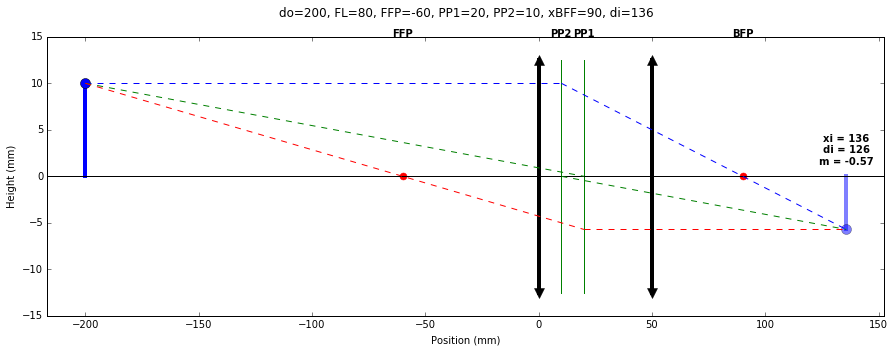

In [12]:
# Interactive call
interact(plotSystem, do=(gDoMin,gDoMax), f1=gFLArg, d=(gDMin,gDMax), f2=gFLArg, MatrixRays=False, \
         ThinLensRays=(0,3));